# FDA - HW3-1
Implement Logistic Regression, Neural Network, and one other classifier to predict the stock movement.  
Dataset:　[S&P 500](https://www.sharecast.com/index/SP_500/prices/download)  
* Training set:　02-Jan-2009 to 29-Dec-2017  
* Test set:　02-Jan-2018 to 31-Dec-2018

## 讀取資料並檢查是否有缺失值
由**info()**可看出training set 和 test set皆無缺失值,  
所以不須填補

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 讀取資料並用info()看是否有缺失值需填補
train = pd.read_csv('./stock_train.csv')
test =  pd.read_csv('./stock_test.csv')
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2264 non-null   object 
 1   Open Price   2264 non-null   float64
 2   Close Price  2264 non-null   float64
 3   High Price   2264 non-null   float64
 4   Low Price    2264 non-null   float64
 5   Volume       2264 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 106.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         252 non-null    object 
 1   Open Price   252 non-null    float64
 2   Close Price  252 non-null    float64
 3   High Price   252 non-null    float64
 4   Low Price    252 non-null    float64
 5   Volume       252 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory us

## 畫折線圖觀察各欄位值的走向
因為**Open Price**, **Close Price**, **High Price**, **Low Price**的值域範圍差不多, 所以畫在同一張圖  
而**Volume**的值域範圍與其他欄位差距過大, 所以獨立畫一張圖  
由於training set蓋的時間範圍有9年,  
若把9年的資料全畫在同一張圖的話較不易觀察詳細,  
因此把每張圖的時間範圍限縮在一年,  
較能看清楚走向

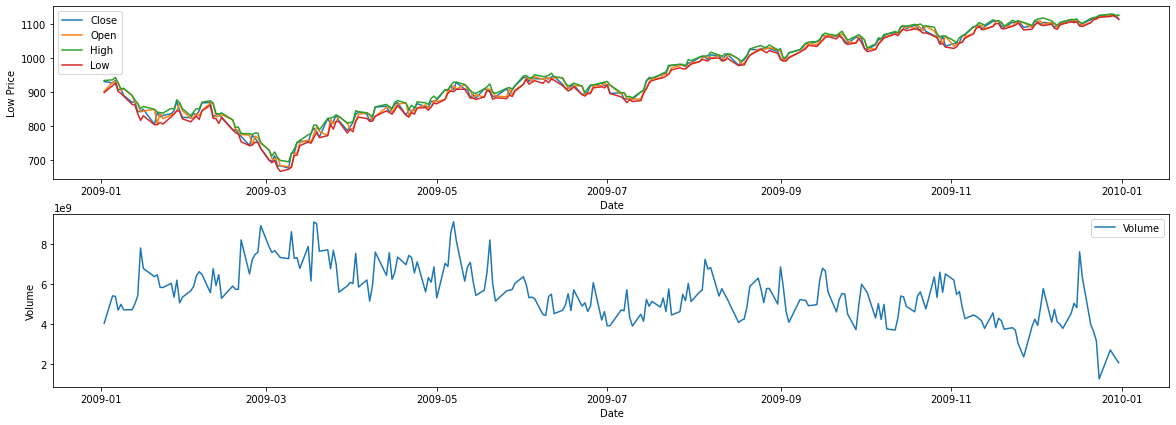

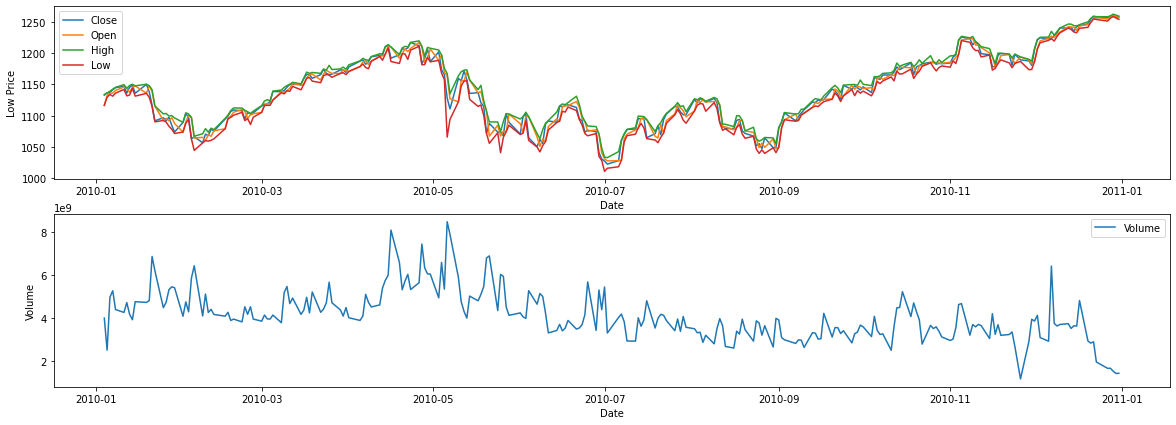

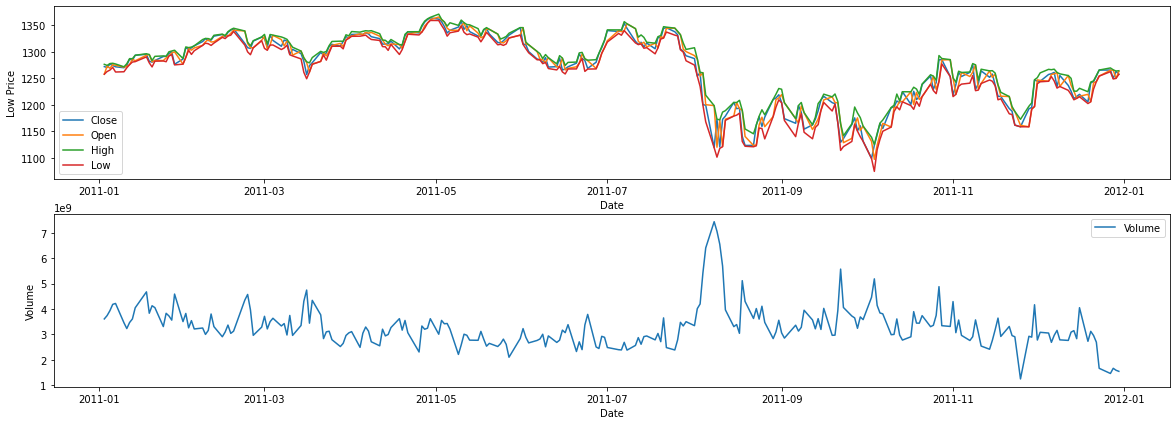

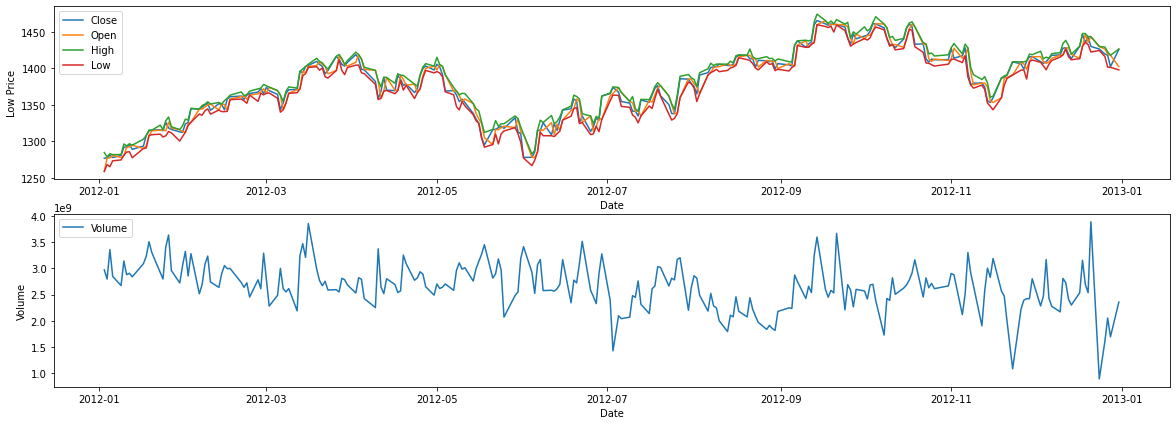

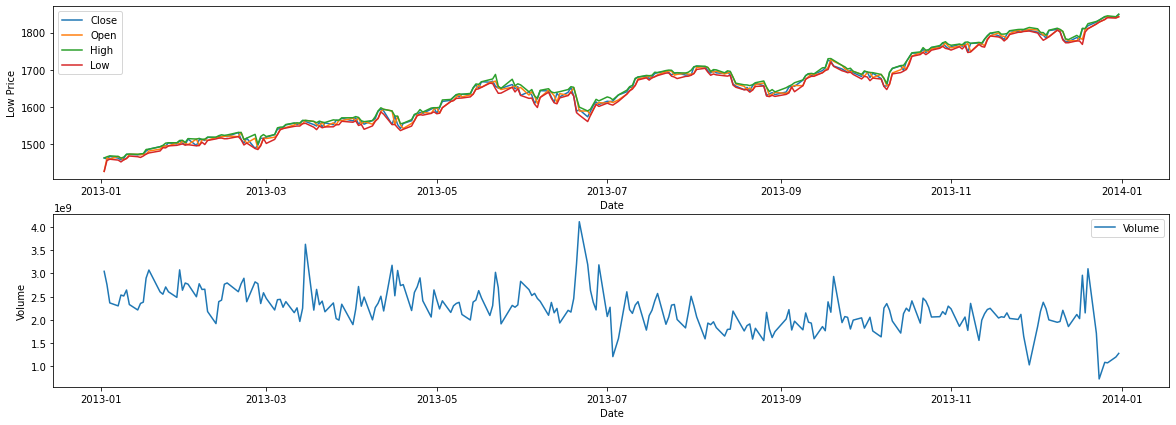

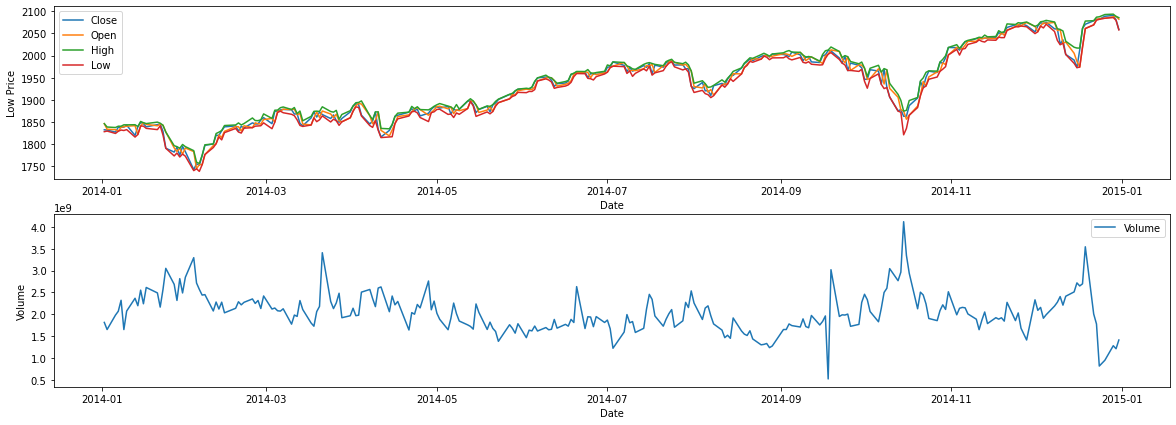

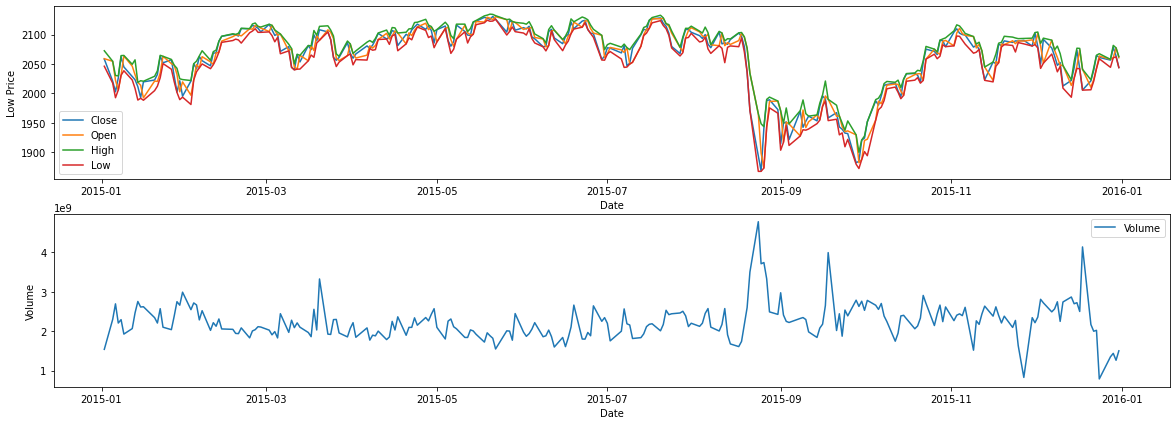

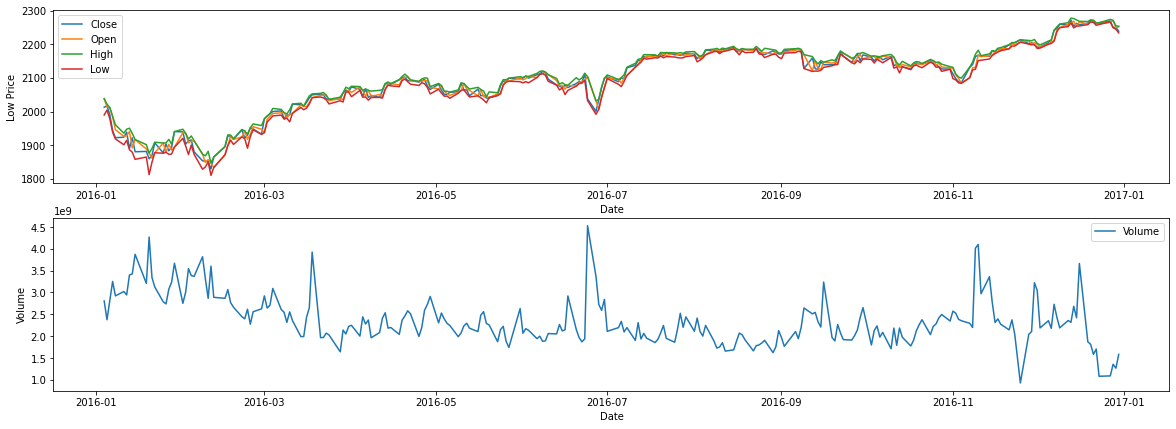

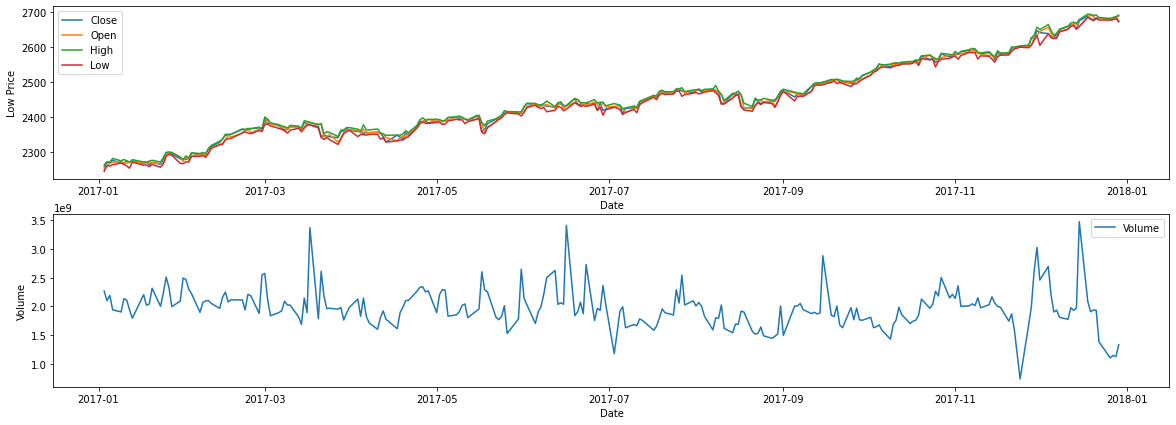

In [2]:
# 將Date欄位轉成時間格式
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# 畫折線圖觀察走向
def draw_lineChart(df):
    x = df['Date']
    y1 = df['Close Price']
    y2 = df['Open Price']
    y3 = df['High Price']
    y4 = df['Low Price']
    y5 = df['Volume']
    
    f, axes = plt.subplots(2, 1, figsize=(20, 7))
    #sns.set(font_scale = 3)
    sns.lineplot(x=df['Date'],
                 y=y1, 
                 data=df,
                label='Close',
                ax=axes[0])
    sns.lineplot(x=df['Date'],
                 y=y2, 
                 data=df,
                label='Open',
                ax=axes[0])
    sns.lineplot(x=df['Date'],
                 y=y3, 
                 data=df,
                label='High',
                ax=axes[0])
    sns.lineplot(x=df['Date'],
                 y=y4, 
                 data=df,
                label='Low',
                ax=axes[0])
    sns.lineplot(x=df['Date'],
                 y=y5, 
                 data=df,
                label='Volume',
                ax=axes[1])
    plt.show()


# 以一年為時間範圍畫圖
def draw_year(df, year):
    df_year =  df[ (df['Date'] >= datetime(year=year, month=1, day=1)) & (df['Date'] <= datetime(year=year, month=12, day=31))]
    draw_lineChart(df_year)


# 畫各年度的折線圖
draw_year(train, 2009)
draw_year(train, 2010)
draw_year(train, 2011)
draw_year(train, 2012)
draw_year(train, 2013)
draw_year(train, 2014)
draw_year(train, 2015)
draw_year(train, 2016)
draw_year(train, 2017)

## 計算Close Price相較於前一天是漲或跌
在 training set 和 test set 增加 '*Close Price_move*' 的欄位,  
該欄位值分為**0**或**1**兩種:  
**0**: 代表*Close Price*相較於前一天是**跌**  
**1**: 代表*Close Price*相較於前一天是**漲**

In [3]:
# 計算欄位值相較於前一天是上升或下降
def calc_move(df, col):
    moveList = []
    for index, row in df.iterrows():
        if index==0:
            moveList.append(None)
        else:
            if df[col][index] <  df[col][index-1]:
                moveList.append(0)
            else:
                moveList.append(1)
    df[col+'_move'] = moveList


# 在training set和test set增加'Close Price_move'的欄位, 代表Close Price相較於前一天是漲或跌
calc_move(train, 'Close Price')
calc_move(test, 'Close Price')

## 計算Volume相較於前一天是漲或跌, 並畫圖觀察Volume與Close Price兩者的漲跌
因為從前面的折線圖看起來, **Open Price**, **High Price**, **Low Price**三者的走勢似乎大致都跟Close Price的走勢差不多   
而**Volume**的走勢則看起來有點跟Close Price相反,    
例如Close Price下降到低谷時Volume是上升到高峰  
所以增加'*Volume_move*'欄位代表Volume的漲跌後,  
再分別畫出**Volume漲跌**與**Close Price漲跌**的圖對照比較  
但比較後發現其實兩者走勢未必相反

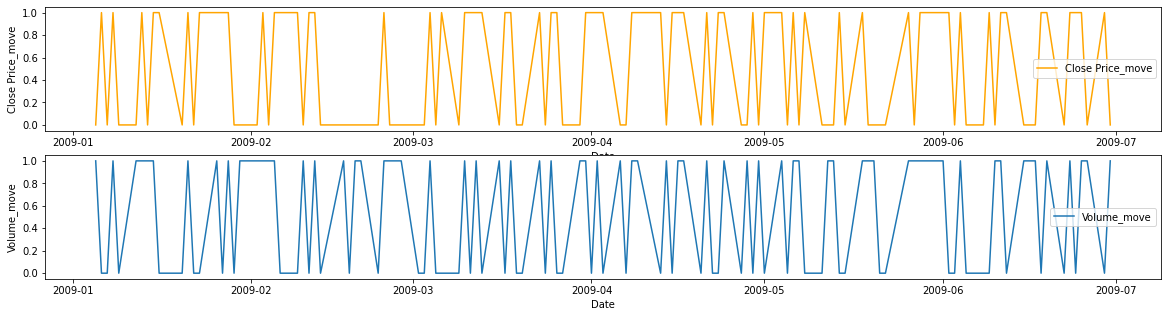

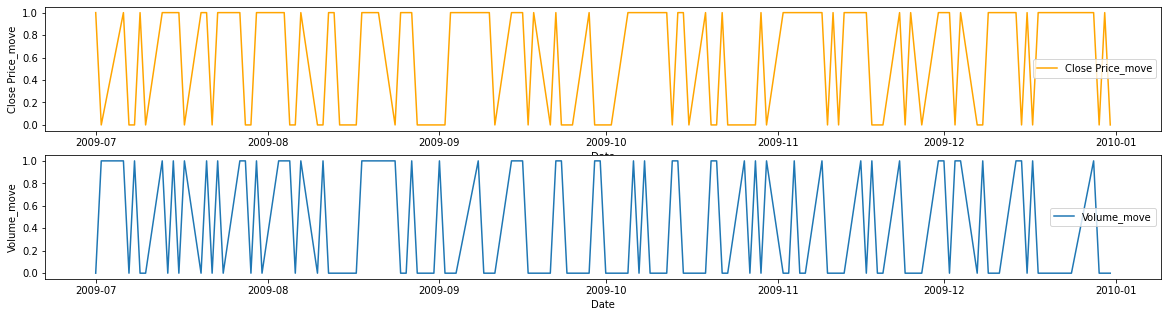

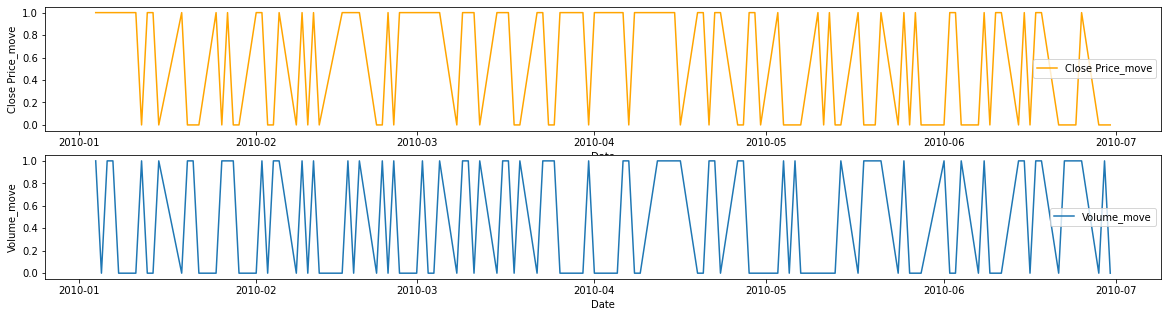

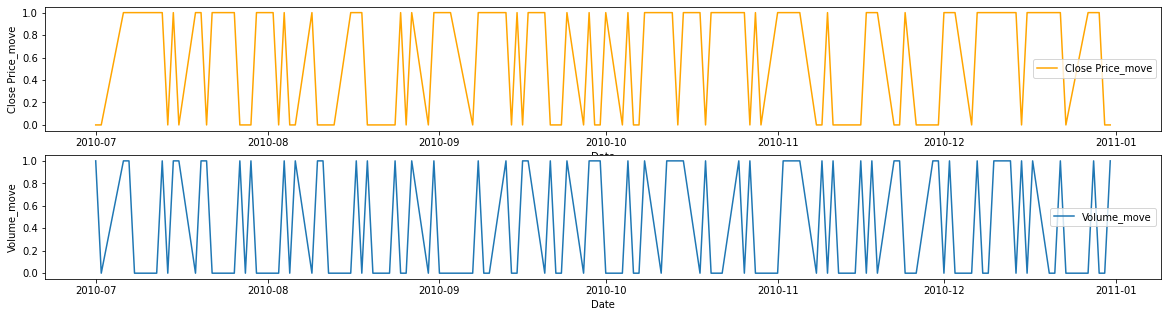

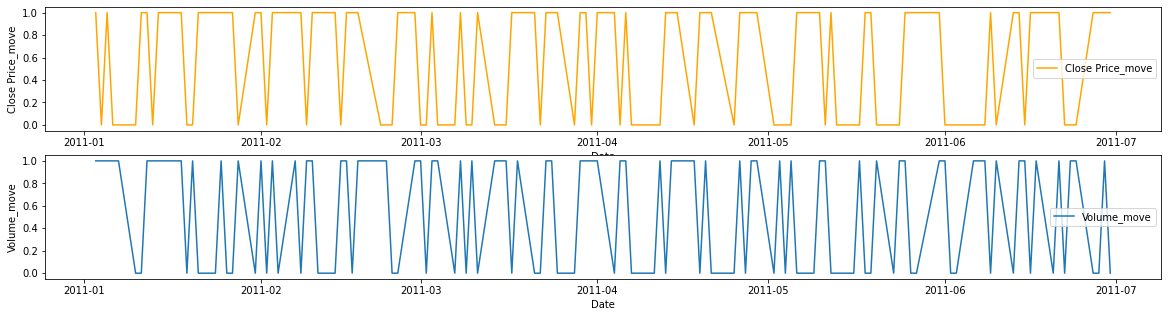

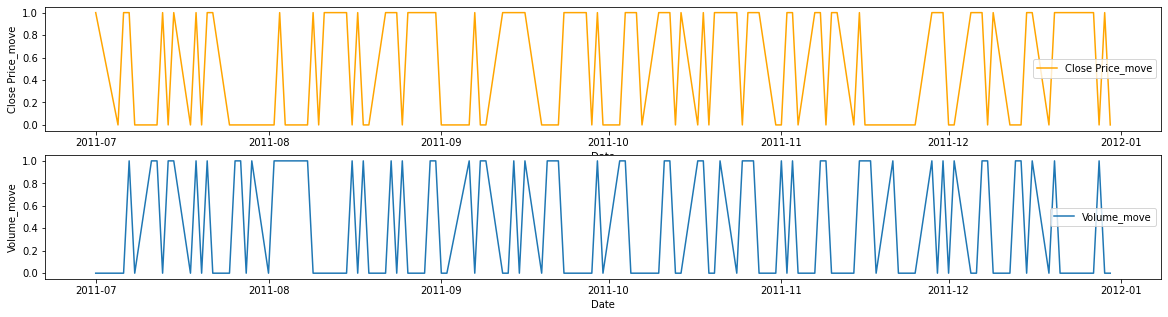

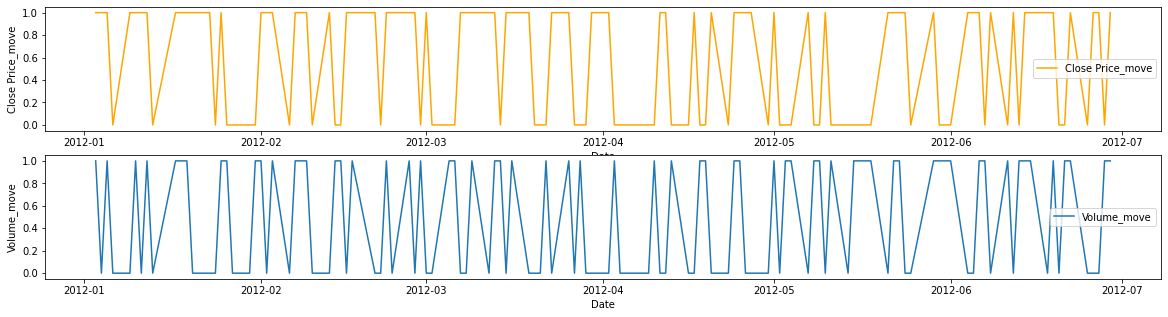

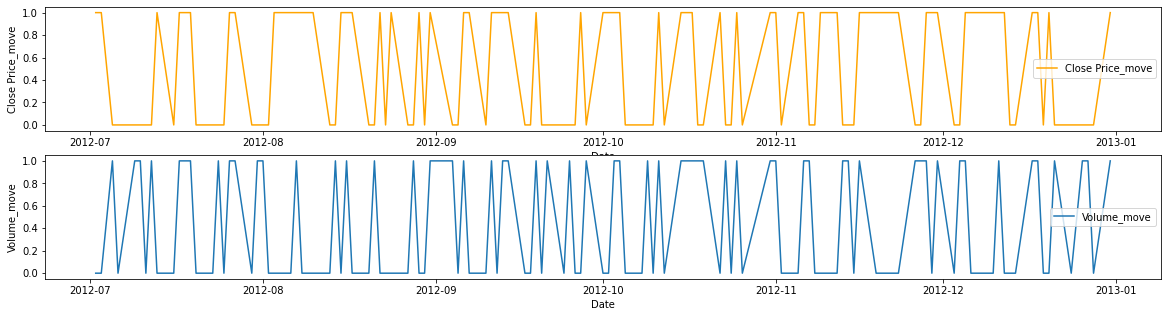

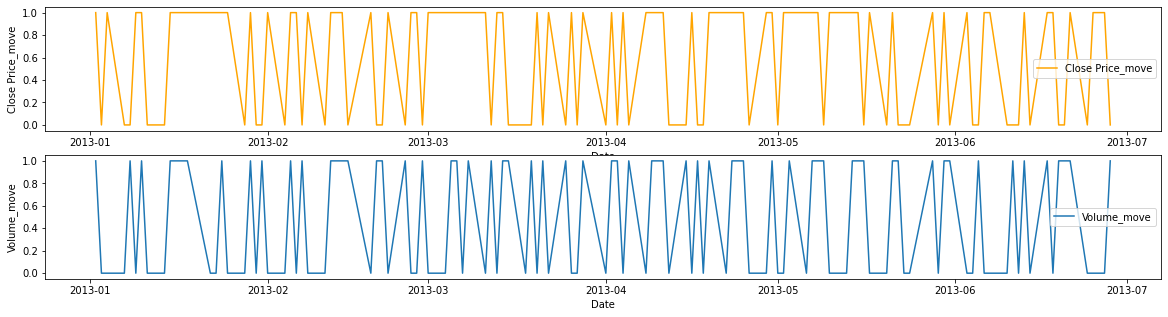

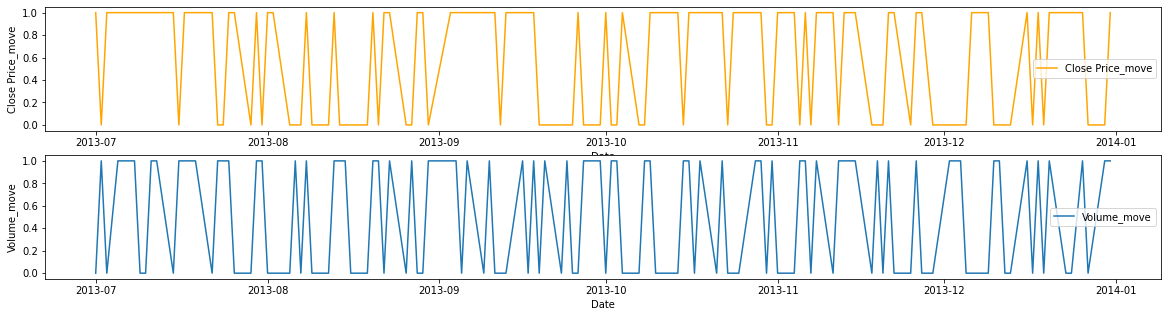

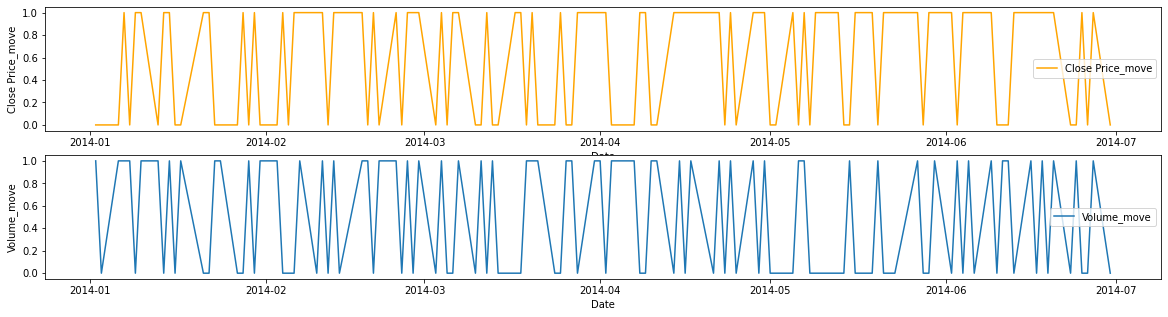

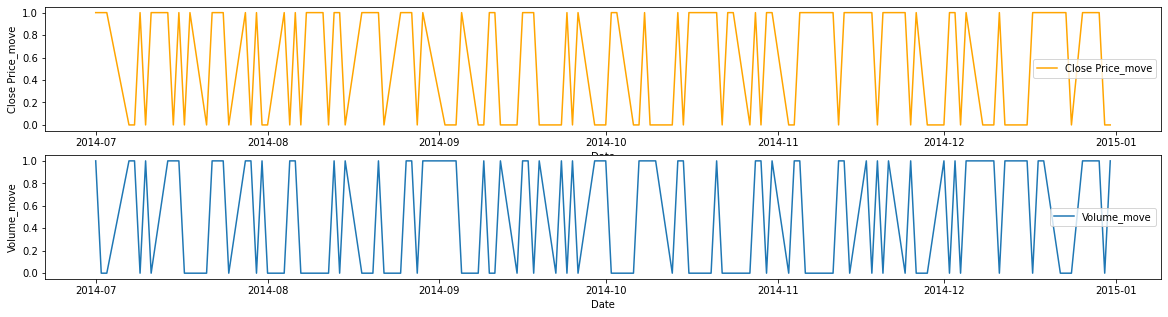

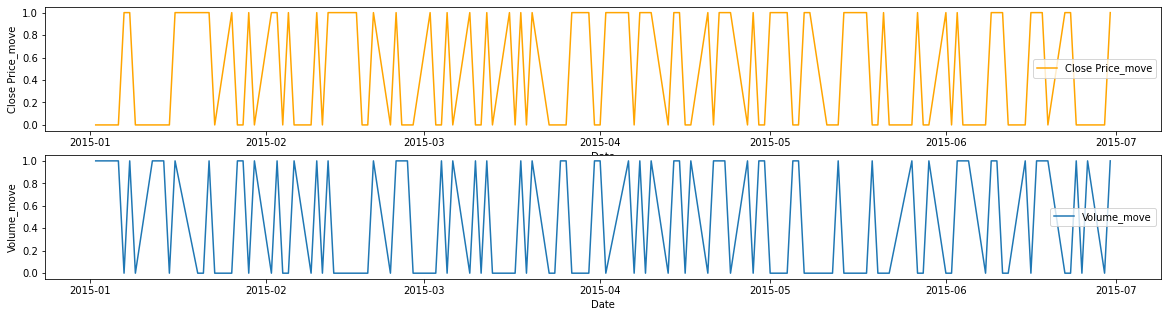

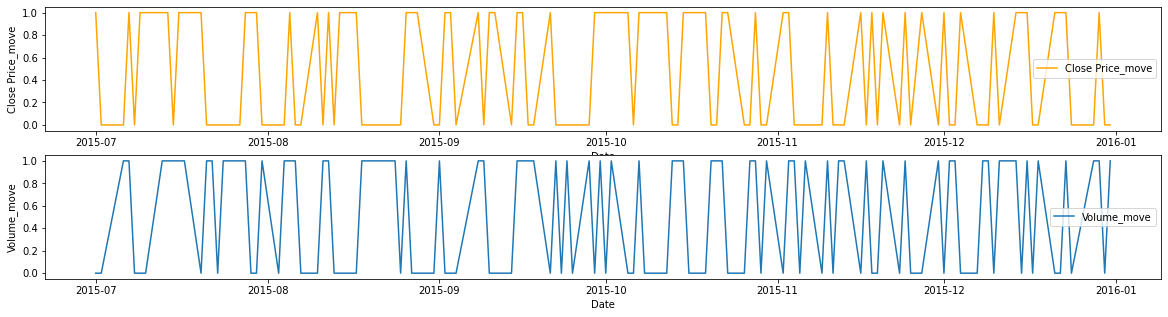

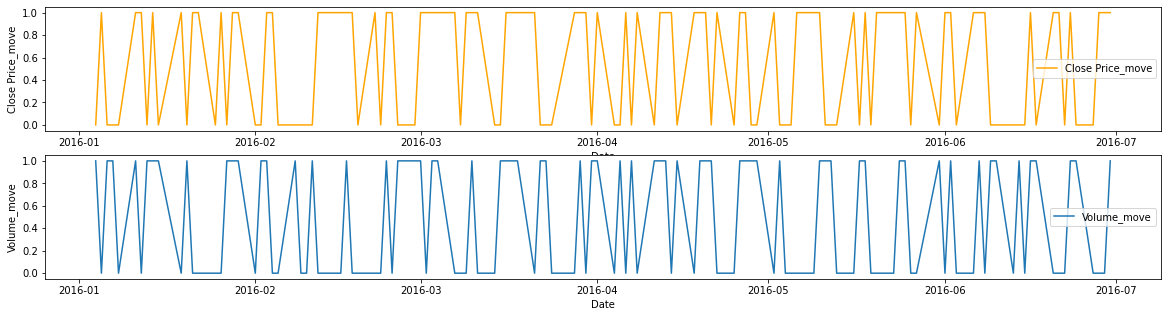

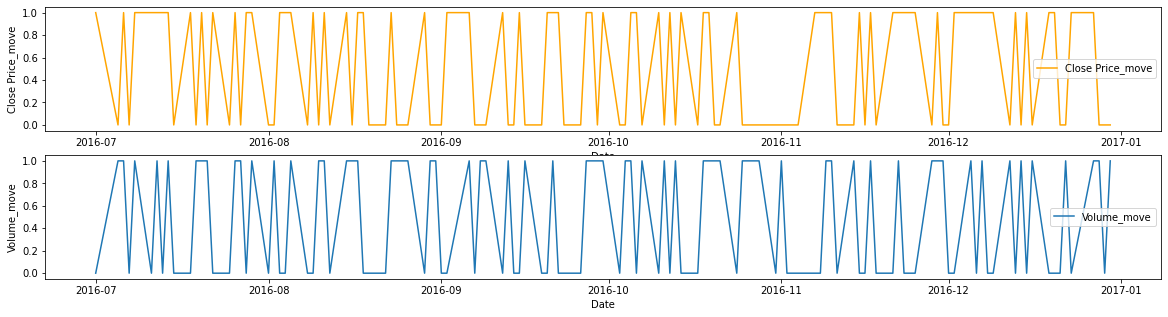

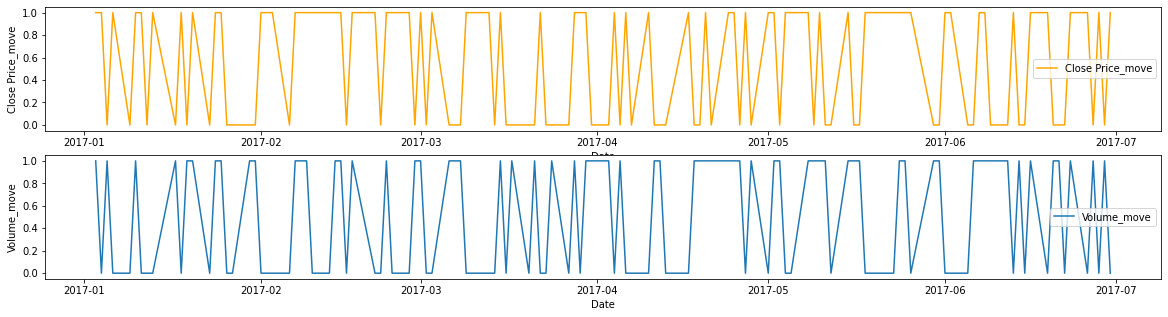

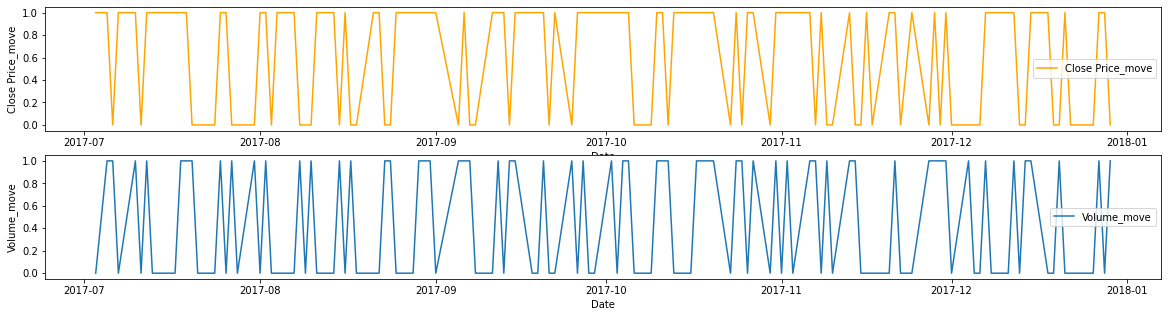

In [4]:
# 在training set增加'Volume_move'的欄位, 代表Volume相較於前一天是漲或跌
calc_move(train, 'Volume')

# 畫出Volume漲跌與Close Price漲跌的圖對照比較, 以半年為一張圖的時間範圍較方便觀察
def draw_move(df, year, half):
    if half == 1: # 上半年
        df_year =  df[ (df['Date'] >= datetime(year=year, month=1, day=1)) & (df['Date'] <= datetime(year=year, month=6, day=30))]
    else: # 下半年
        df_year =  df[ (df['Date'] >= datetime(year=year, month=7, day=1)) & (df['Date'] <= datetime(year=year, month=12, day=31))]
    
    x = df_year['Date']
    y1 = df_year['Close Price_move']
    y2 = df_year['Volume_move']
    
    f, axes = plt.subplots(2, 1, figsize=(20, 5))
    #sns.set(font_scale = 3)
    sns.lineplot(x=df['Date'],
                 y=y1, 
                 data=df_year,
                label='Close Price_move',
                 color='orange',
                ax=axes[0])
    sns.lineplot(x=df['Date'],
                 y=y2, 
                 data=df_year,
                label='Volume_move',
                ax=axes[1])
    plt.show()

    
# 每半年畫一張圖
draw_move(train, 2009, 1) # 2009上半年 (1~6月)
draw_move(train, 2009, 2) # 2009下半年 (7~12月)
draw_move(train, 2010, 1)
draw_move(train, 2010, 2)
draw_move(train, 2011, 1)
draw_move(train, 2011, 2)
draw_move(train, 2012, 1)
draw_move(train, 2012, 2)
draw_move(train, 2013, 1)
draw_move(train, 2013, 2)
draw_move(train, 2014, 1)
draw_move(train, 2014, 2)
draw_move(train, 2015, 1)
draw_move(train, 2015, 2)
draw_move(train, 2016, 1)
draw_move(train, 2016, 2)
draw_move(train, 2017, 1)
draw_move(train, 2017, 2)

## 觀察相關係數
從相關係數看出**Open Price**, **High Price**, **Low Price**都與Close Price有高度正相關,  
**Volume**與Close Price也有滿高的負相關

Correlation coefficient between "Close Price" and other features: 
Open Price          0.999613
Close Price         1.000000
High Price          0.999829
Low Price           0.999855
Volume             -0.728896
Close Price_move    0.000997
Volume_move         0.017906
Name: Close Price, dtype: float64



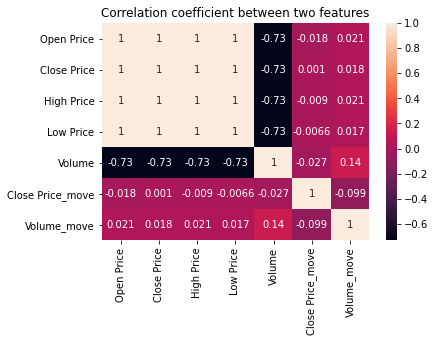

In [5]:
# 相關係數
# 觀察Close Price分別與其他各feature之間的相關係數
print('Correlation coefficient between "Close Price" and other features: ')
print(train.corr()['Close Price'])
print()
# 觀察任兩個features之間的相關係數
sns.heatmap(train.corr(), annot=True)
plt.title('Correlation coefficient between two features')
plt.show()

## 模型訓練並計算準確度
* 先使用**5-fold cross validation**，輸出平均準確度
* 再使用所有training set進行訓練並輸出準確度
* 最後預測test set並輸出準確度

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# 先用5-fold cross validation，再用所有training set進行訓練, 訓練完成後預測test set
def train_and_predict(model, train_df, test_df, features):
    train_x = train_df[features]
    test_x = test_df[features]
    
    kf = KFold(n_splits=5,
               random_state=1012,
               shuffle=True)
    kf.get_n_splits(train_x)

    train_acc_list = []
    valid_acc_list = [] 

    # 5-fold cross validation
    for train_index, valid_index in kf.split(train_x):
        train_x_split = train_x.iloc[train_index]
        train_y_split = train_y.iloc[train_index]
        valid_x_split = train_x.iloc[valid_index]
        valid_y_split = train_y.iloc[valid_index]
        
        model.fit(train_x_split, train_y_split)
        
        train_pred_y = model.predict(train_x_split)
        train_acc = accuracy_score(train_y_split,
                                   train_pred_y)
        valid_pred_y = model.predict(valid_x_split)
        valid_acc = accuracy_score(valid_y_split,
                                   valid_pred_y)
        
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)
        
    # 輸出5-fold cross validation的平均準確度
    print((
        'average train accuracy: {}\n' +
        '    min train accuracy: {}\n' +
        '    max train accuracy: {}\n' +
        'average valid accuracy: {}\n' +
        '    min valid accuracy: {}\n' +
        '    max valid accuracy: {}').format(
        np.mean(train_acc_list),
        np.min(train_acc_list),
        np.max(train_acc_list),
        np.mean(valid_acc_list),
        np.min(valid_acc_list),
        np.max(valid_acc_list)
    ))

    # 用所有training set進行訓練並輸出準確度
    model.fit(train_x, train_y)
    pred_y = model.predict(train_x)
    acc = accuracy_score(train_y, pred_y)
    print('train accuracy: {}'.format(acc))

    # 預測test set並輸出準確度
    pred_y = model.predict(test_x)
    acc = accuracy_score(test_y, pred_y)
    print('test accuracy: {}\n'.format(acc))
    print()

## Logistic Regression
試了5種含3個features以上的輸入組合,  
其中 **['Open Price', 'High Price', 'Low Price']** 和  **['Open Price', 'High Price', 'Low Price', 'Volume']** 是結果較佳的組合  
而 **['High Price', 'Low Price', 'Volume']** 是結果最差的組合, 這個組合是5組中唯一一組沒有含**Open Price**的,  
因此推測**Open Price**可能是提高預測準確率的關鍵

In [7]:
# 因為第一天沒有前一天的值可比較漲跌, 所以捨棄掉
train_drop = train.dropna(axis=0, subset=['Close Price_move']) 
test_drop = test.dropna(axis=0, subset=['Close Price_move'])
train_drop = train_drop.reset_index(drop=True)
test_drop = test_drop.reset_index(drop=True)
train_y = train_drop['Close Price_move']
test_y = test_drop['Close Price_move']

# 不同的輸入features組合
f1 = ['Open Price', 'High Price', 'Low Price']
f2 = ['Open Price', 'High Price', 'Low Price', 'Volume']
f3 = ['Open Price', 'High Price', 'Volume']
f4 = ['Open Price', 'Low Price', 'Volume']
f5 = ['High Price', 'Low Price', 'Volume']

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(penalty = 'l2',
                              dual = False,
                              C = 1,
                              fit_intercept = True,
                             intercept_scaling = 1,
                             solver = 'newton-cg',
                             multi_class = 'ovr',
                             class_weight = 'balanced',
                             max_iter = 500,
                             tol = 1e-6,
                             verbose = 0,
                             warm_start = False,
                             n_jobs = -1)

train_and_predict(LR_model, train_drop, test_drop, f1) # ['Open Price', 'High Price', 'Low Price']
train_and_predict(LR_model, train_drop, test_drop, f2) # ['Open Price', 'High Price', 'Low Price', 'Volume']
train_and_predict(LR_model, train_drop, test_drop, f3) # ['Open Price', 'High Price', 'Volume']
train_and_predict(LR_model, train_drop, test_drop, f4) # ['Open Price', 'Low Price', 'Volume']
train_and_predict(LR_model, train_drop, test_drop, f5) # ['High Price', 'Low Price', 'Volume']

average train accuracy: 0.8572692965944764
    min train accuracy: 0.8509110988404197
    max train accuracy: 0.8619547211485368
average valid accuracy: 0.8532946531481373
    min valid accuracy: 0.8366445916114791
    max valid accuracy: 0.8716814159292036
train accuracy: 0.8555015466195316
test accuracy: 0.8007968127490039


average train accuracy: 0.7716350967537242
    min train accuracy: 0.45027624309392267
    max train accuracy: 0.8547763666482606
average valid accuracy: 0.779556154642599
    min valid accuracy: 0.46357615894039733
    max valid accuracy: 0.8741721854304636
train accuracy: 0.8590366769774636
test accuracy: 0.8047808764940239


average train accuracy: 0.7733087851710388
    min train accuracy: 0.7546961325966851
    max train accuracy: 0.7840971838763114
average valid accuracy: 0.7763923889898221
    min valid accuracy: 0.7389380530973452
    max valid accuracy: 0.8233995584988962
train accuracy: 0.7512152010605391
test accuracy: 0.6892430278884463


average trai

## 計算前幾天的平均值
因為是時序性資料, 所以嘗試增加能代表過去的資料欄位, 提供參考判斷的依據

In [8]:
# 計算前幾天某欄位的平均值
def calc_past_mean(df, col, days):
    past_mean_list = []
    for index, row in df.iterrows():
        if index < days:
            past_mean_list.append(None)
        if index >= days:
            start = index - days
            past_mean_list.append(df[col].iloc[start:index].mean())
    
    df[col + ' Past mean'] = past_mean_list

## 增加輸入前5天平均值後再訓練一次
預測的準確率普遍有提昇,  
尤其原本準確率特別低的 **['High Price', 'Low Price', 'Volume']** 輸入組合,  
在增加前5天平均值的欄位之後, 準確率有大幅提昇

In [9]:
# 在training set和test set中增加'Open Price Past mean', 'High Price Past mean', 'Low Price Past mean'欄位, 
# 分別代表前5天Open Price, High Price, Low Price的平均值
calc_past_mean(train_drop, 'Open Price', 5)
calc_past_mean(test_drop, 'Open Price', 5)
calc_past_mean(train_drop, 'High Price', 5)
calc_past_mean(test_drop, 'High Price', 5)
calc_past_mean(train_drop, 'Low Price', 5)
calc_past_mean(test_drop, 'Low Price', 5)

# 因為開頭的幾天無法計算Past mean的欄位, 所以捨棄掉
train_drop = train_drop.dropna(axis=0, subset=['Open Price Past mean']) 
test_drop = test_drop.dropna(axis=0, subset=['Open Price Past mean'])
train_drop = train_drop.reset_index(drop=True)
test_drop = test_drop.reset_index(drop=True)

# 增加新的5組輸入features, 
# 由原本5組features都各自再加入'Open Price Past mean', 'High Price Past mean', 'Low Price Past mean'而得
f6 = f1 + ['Open Price Past mean', 'High Price Past mean', 'Low Price Past mean']
f7 = f2 + ['Open Price Past mean', 'High Price Past mean', 'Low Price Past mean']
f8 = f3 + ['Open Price Past mean', 'High Price Past mean', 'Low Price Past mean']
f9 = f4 + ['Open Price Past mean', 'High Price Past mean', 'Low Price Past mean']
f10 = f5 + ['Open Price Past mean', 'High Price Past mean', 'Low Price Past mean']
train_y = train_drop['Close Price_move']
test_y = test_drop['Close Price_move']

# 增加輸入前5天平均值後再訓練一次
train_and_predict(LR_model, train_drop, test_drop, f6)
train_and_predict(LR_model, train_drop, test_drop, f7)
train_and_predict(LR_model, train_drop, test_drop, f8)
train_and_predict(LR_model, train_drop, test_drop, f9)
train_and_predict(LR_model, train_drop, test_drop, f10)

average train accuracy: 0.8571749704759576
    min train accuracy: 0.853266888150609
    max train accuracy: 0.863233665559247
average valid accuracy: 0.8538635873084394
    min valid accuracy: 0.8296460176991151
    max valid accuracy: 0.8691796008869179
train accuracy: 0.8565101860053145
test accuracy: 0.7926829268292683


average train accuracy: 0.8464347152485014
    min train accuracy: 0.8222591362126246
    max train accuracy: 0.8621262458471761
average valid accuracy: 0.8436797284304299
    min valid accuracy: 0.8296460176991151
    max valid accuracy: 0.8647450110864745
train accuracy: 0.845881310894597
test accuracy: 0.8130081300813008


average train accuracy: 0.772805338657773
    min train accuracy: 0.7596899224806202
    max train accuracy: 0.7880464858882125
average valid accuracy: 0.7763553950905558
    min valid accuracy: 0.75
    max valid accuracy: 0.7920353982300885
train accuracy: 0.7776793622674933
test accuracy: 0.7154471544715447


average train accuracy: 0.74491

## Neural Network
一開始先使用原本的資料訓練**MLPClassifier**,  
但預測出來的準確率極低

In [10]:
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(hidden_layer_sizes = (10,20,10,5,5),
                         activation = 'identity',
                         solver = 'adam',
                         alpha = 0.01,
                         batch_size = 'auto',
                         learning_rate = 'constant',
                         max_iter = 1000,
                         random_state = 42,
                         shuffle = True,
                         tol = 1e-6,
                         learning_rate_init = 0.001,
                         verbose = False,
                         warm_start = False,
                         early_stopping = False,
                         beta_1 = 0.9,
                         beta_2 = 0.999,
                         epsilon = 1e-8,
                         n_iter_no_change = 10)

train_and_predict(MLP_model, train_drop, test_drop, f1)

average train accuracy: 0.48283425904305943
    min train accuracy: 0.4108527131782946
    max train accuracy: 0.5489762036524627
average valid accuracy: 0.4712252025979632
    min valid accuracy: 0.3893805309734513
    max valid accuracy: 0.5420353982300885
train accuracy: 0.45217006200177146
test accuracy: 0.483739837398374




## 標準化後再次使用Neural Network model  
因為原本的資料中每個欄位的值域分佈範圍都超過$10^2$, 所以嘗試將資料標準化  
用標準化後的資料再次訓練**MLPClassifier**, 準確率大幅提昇

In [11]:
from sklearn.preprocessing import StandardScaler
def normalize(orig_train, orig_test, col):
    scaler = StandardScaler()
    scaler.fit(orig_train[col].to_numpy().reshape(-1, 1))
    new_train = orig_train.copy()
    new_test = orig_test.copy()
    new_train[col] = scaler.transform(orig_train[col].to_numpy().reshape(-1, 1))
    new_test[col] = scaler.transform(orig_test[col].to_numpy().reshape(-1, 1))
    
    return new_train, new_test


train_norm, test_norm = normalize(train_drop, test_drop, 'Volume')
train_norm, test_norm = normalize(train_norm, test_norm, 'Open Price')
train_norm, test_norm = normalize(train_norm, test_norm, 'High Price')
train_norm, test_norm = normalize(train_norm, test_norm, 'Low Price')
train_norm, test_norm = normalize(train_norm, test_norm, 'Open Price Past mean')
train_norm, test_norm = normalize(train_norm, test_norm, 'High Price Past mean')
train_norm, test_norm = normalize(train_norm, test_norm, 'Low Price Past mean')

train_and_predict(MLP_model, train_norm, test_norm, f1)

average train accuracy: 0.5899139620069853
    min train accuracy: 0.5257332595462092
    max train accuracy: 0.7818383167220376
average valid accuracy: 0.5880952848144732
    min valid accuracy: 0.5343680709534369
    max valid accuracy: 0.7477876106194691
train accuracy: 0.8255093002657219
test accuracy: 0.8292682926829268




## One other classifier : SVM
使用 **['Open Price', 'High Price', 'Low Price']** 這個組合作為SVM model的輸入時, 資料有沒有normalize對於準確率而言並沒有顯著影響,  
但若使用 **['Open Price', 'High Price', 'Low Price', 'Volume']** 這個組合作為SVM model的輸入時,  資料有normalize過能使準確率大幅提昇  
可能是對於這個model來說, Open Price, High Price, Low Price的min與max差距都還不算太大,  
但**Volume**的min與max差距過大,  所以經normalize後的結果較佳

In [12]:
from sklearn.svm import LinearSVC
SVM_model = LinearSVC(penalty = 'l2',
                     loss = 'squared_hinge',
                     dual = False,
                     tol = 1e-6,
                     C = 1,
                     multi_class = 'ovr',
                     fit_intercept = True,
                     intercept_scaling = 1,
                     class_weight = 'balanced',
                     verbose = 0,
                     random_state = 42,
                     max_iter = 300)

train_and_predict(SVM_model, train_drop, test_drop, f1) # ['Open Price', 'High Price', 'Low Price'] 未normalize
train_and_predict(SVM_model, train_norm, test_norm, f1) # ['Open Price', 'High Price', 'Low Price'] 有normalize
train_and_predict(SVM_model, train_drop, test_drop, f2) #  ['Open Price', 'High Price', 'Low Price', 'Volume'] 未normalize
train_and_predict(SVM_model, train_norm, test_norm, f2) #  ['Open Price', 'High Price', 'Low Price', 'Volume'] 有normalize

average train accuracy: 0.8569539768134382
    min train accuracy: 0.8516878804648589
    max train accuracy: 0.8626799557032115
average valid accuracy: 0.8551959264564488
    min valid accuracy: 0.831858407079646
    max valid accuracy: 0.8713968957871396
train accuracy: 0.8556244464127547
test accuracy: 0.7926829268292683


average train accuracy: 0.8498678389258949
    min train accuracy: 0.8450470392916436
    max train accuracy: 0.8554817275747508
average valid accuracy: 0.8476718403547672
    min valid accuracy: 0.8163716814159292
    max valid accuracy: 0.8736141906873615
train accuracy: 0.8520814880425155
test accuracy: 0.8008130081300813


average train accuracy: 0.4687770764732451
    min train accuracy: 0.44881018262313227
    max train accuracy: 0.49778516057585825
average valid accuracy: 0.46280438749681146
    min valid accuracy: 0.45353982300884954
    max valid accuracy: 0.4722838137472284
train accuracy: 0.45217006200177146
test accuracy: 0.483739837398374


average tr